In [1]:
#Extract the data and listed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

assignment_Data = pd.read_csv('all_month.csv')

In [2]:
#Data preparation and cleaning
#drop the duplicates
assignment_Data.drop_duplicates(inplace=True)
print(len(assignment_Data))

8602


In [3]:
#to check if ther NaN value on the dataframe
#true if column contains NaN values
assignment_Data.isna().any()

time               False
latitude           False
longitude          False
depth              False
mag                False
magType            False
nst                 True
gap                 True
dmin                True
rms                False
net                False
id                 False
updated            False
place              False
type               False
horizontalError     True
depthError          True
magError            True
magNst              True
status             False
locationSource     False
magSource          False
dtype: bool

In [4]:
assignment_Data.dropna(inplace=True)

In [5]:
#to check if data already cleared.
assignment_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3409 entries, 4 to 8581
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             3409 non-null   object 
 1   latitude         3409 non-null   float64
 2   longitude        3409 non-null   float64
 3   depth            3409 non-null   float64
 4   mag              3409 non-null   float64
 5   magType          3409 non-null   object 
 6   nst              3409 non-null   float64
 7   gap              3409 non-null   float64
 8   dmin             3409 non-null   float64
 9   rms              3409 non-null   float64
 10  net              3409 non-null   object 
 11  id               3409 non-null   object 
 12  updated          3409 non-null   object 
 13  place            3409 non-null   object 
 14  type             3409 non-null   object 
 15  horizontalError  3409 non-null   float64
 16  depthError       3409 non-null   float64
 17  magError      

In [6]:
#to find 5 largest magnitude
assignment_Data.nlargest(5,'mag')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
8177,2022-05-08T13:32:58.400Z,18.975500,-64.358500,25.000000,5.50,ml,31.0,214.0,1.482200,0.35,...,2022-05-18T15:05:36.040Z,"84 km NNE of Cruz Bay, U.S. Virgin Islands",earthquake,1.550000,26.800000,0.12,23.0,reviewed,pr,pr
974,2022-06-01T15:46:10.839Z,31.715266,-104.550914,6.157275,4.60,ml,45.0,90.0,0.048927,0.30,...,2022-06-02T18:11:04.892Z,western Texas,earthquake,1.554476,0.987253,0.10,25.0,reviewed,tx,tx
989,2022-06-01T15:01:49.756Z,31.599574,-103.981938,9.627856,4.30,ml,28.0,52.0,0.085651,0.20,...,2022-06-02T20:13:33.494Z,"36 km NNW of Toyah, Texas",earthquake,1.071647,0.935472,0.20,15.0,reviewed,tx,tx
7256,2022-05-11T13:32:02.230Z,44.681000,-109.996333,13.950000,4.22,ml,29.0,113.0,0.073450,0.22,...,2022-06-05T20:48:38.793Z,Wyoming,earthquake,0.610000,0.870000,0.36,6.0,reviewed,uu,uu
116,2022-06-05T10:03:32.970Z,17.830800,-68.565000,70.000000,4.19,md,27.0,209.0,0.707300,0.31,...,2022-06-05T10:47:01.830Z,"60 km S of Boca de Yuma, Dominican Republic",earthquake,1.390000,1.950000,0.09,22.0,reviewed,pr,pr


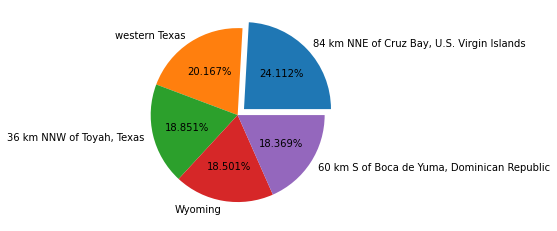

In [25]:
#pie chart from 5 largest magnitude
top_five = assignment_Data.sort_values(by='mag',ascending=False).head(5)
#print(top_five)
place = top_five['place']
magnitude = top_five['mag']
plt.pie(magnitude,labels=place, radius=1, autopct='%0.3f%%', explode=[0.1,0,0,0,0])
plt.show()

In [8]:
#to check if we can grouping data & see what city that has most data
assignment_Data.groupby(['place']).count().sort_values(by=['time'],ascending=False)


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
place,,,,,,,,,,,,,,,,,,,,,
"8km NW of The Geysers, CA",38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
"7km NW of The Geysers, CA",30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
"6km NW of The Geysers, CA",28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
"7km W of Cobb, CA",24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
"7km NE of Desert Hot Springs, CA",23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"29km E of Hydesville, CA",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"29 km SSE of Mossyrock, Washington",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"29 km SE of Virginia City, Montana",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [9]:
#to change the time of data format into year month day format
assignment_Data['time'] = pd.to_datetime(assignment_Data['time'])


In [15]:
#to extract data for 1 locations as the most frequently ( on same city)
location1=assignment_Data[assignment_Data['place'] == '8km NW of The Geysers, CA']
location2=assignment_Data[assignment_Data['place'] == '7km NW of The Geysers, CA']
location3=assignment_Data[assignment_Data['place'] == '6km NW of The Geysers, CA']
print(location1,location2,location3)


                                 time   latitude   longitude  depth   mag  \
156  2022-06-05 03:16:41.630000+00:00  38.828167 -122.813500   1.98  2.34   
2267 2022-05-27 18:28:05.510000+00:00  38.832333 -122.815498   1.53  0.77   
2883 2022-05-25 22:22:43.960000+00:00  38.830166 -122.814331   1.84  1.10   
3146 2022-05-25 06:03:53.060000+00:00  38.831001 -122.817337   1.87  0.65   
3268 2022-05-24 20:50:24.860000+00:00  38.831833 -122.816167   1.99  1.49   
3565 2022-05-23 21:42:22.480000+00:00  38.828499 -122.814331   2.29  0.57   
3567 2022-05-23 21:41:04.210000+00:00  38.828667 -122.814667   2.27  1.08   
3881 2022-05-22 22:37:22.200000+00:00  38.828167 -122.814333   1.61  0.74   
4087 2022-05-22 04:28:02.010000+00:00  38.832000 -122.825167   1.70  0.40   
4373 2022-05-21 03:07:44.240000+00:00  38.833333 -122.815167   1.97  1.21   
5078 2022-05-18 14:49:12.880000+00:00  38.830166 -122.809334   1.83  0.71   
5171 2022-05-18 07:43:20.840000+00:00  38.831500 -122.816667   1.87  1.47   

Text(0.5, 1.0, '6km The Geysers')

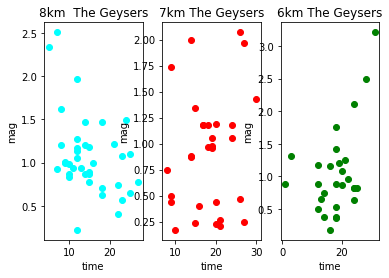

In [20]:
#to compare same city different location

#extract the X & Y axis
x1=location1['time'].dt.day
y1=location1['mag']
x2=location2['time'].dt.day
y2=location2['mag']
x3=location3['time'].dt.day
y3=location3['mag']

#create the scatter plot each location
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.scatter(x1,y1, color = "cyan")
ax2.scatter(x2,y2, color = "red")
ax3.scatter(x3,y3, color = "green")

#create the title & label
ax1.set_xlabel("time")
ax1.set_ylabel("mag")
ax1.set_title('8km  The Geysers')
ax2.set_xlabel("time")
ax2.set_ylabel("mag")
ax2.set_title('7km The Geysers')
ax3.set_xlabel("time")
ax3.set_ylabel("mag")
ax3.set_title('6km The Geysers')

#From those scatter plot can see which area the frequent and the scale of damage

Text(0, 0.5, 'mag')

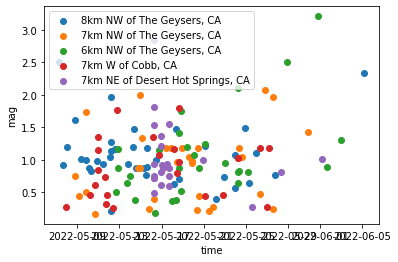

In [26]:
#Create the scatter for top 5 area that has more data 

df = assignment_Data.groupby(['place']).count().sort_values(by=['time'],ascending=False).head(5)
top_name= df.index

#loop for iterate
fig, ax=plt.subplots()

for name in top_name:
    #print(name)
    place_df=assignment_Data[assignment_Data['place']== name]
    #print(place_df)

    # extract x/y
    x = place_df['time']
    y = place_df['mag']
    ax.scatter(x,y, label=name)

ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("mag")
 #place_df = df[df['place'] = place

Text(0, 0.5, 'mag')

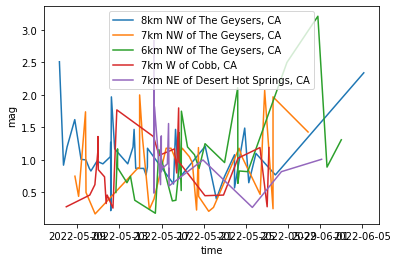

In [27]:
#Create the scatter for top 5 area that has more data 

df = assignment_Data.groupby(['place']).count().sort_values(by=['time'],ascending=False).head(5)
top_name= df.index

#loop for iterate
fig, ax=plt.subplots()

for name in top_name:
    #print(name)
    place_df=assignment_Data[assignment_Data['place']== name]
    #print(place_df)

    # extract x/y
    x = place_df['time']
    y = place_df['mag']
    ax.plot(x,y, label=name)

ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("mag")
 #place_df = df[df['place'] = place

Text(0, 0.5, 'mag')

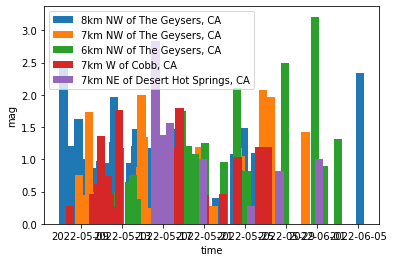

In [28]:
#Create the scatter for top 5 area that has more data 

df = assignment_Data.groupby(['place']).count().sort_values(by=['time'],ascending=False).head(5)
top_name= df.index

#loop for iterate
fig, ax=plt.subplots()

for name in top_name:
    #print(name)
    place_df=assignment_Data[assignment_Data['place']== name]
    #print(place_df)

    # extract x/y
    x = place_df['time']
    y = place_df['mag']
    ax.bar(x,y, label=name)

ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("mag")
 #place_df = df[df['place'] = place

In [77]:
#Separate the numeric coloumn for 5 area that has more data

specific_data = df.describe()
print(specific_data)


           time  latitude  longitude     depth       mag   magType       nst  \
count   5.00000   5.00000    5.00000   5.00000   5.00000   5.00000   5.00000   
mean   28.60000  28.60000   28.60000  28.60000  28.60000  28.60000  28.60000   
std     5.98331   5.98331    5.98331   5.98331   5.98331   5.98331   5.98331   
min    23.00000  23.00000   23.00000  23.00000  23.00000  23.00000  23.00000   
25%    24.00000  24.00000   24.00000  24.00000  24.00000  24.00000  24.00000   
50%    28.00000  28.00000   28.00000  28.00000  28.00000  28.00000  28.00000   
75%    30.00000  30.00000   30.00000  30.00000  30.00000  30.00000  30.00000   
max    38.00000  38.00000   38.00000  38.00000  38.00000  38.00000  38.00000   

            gap      dmin       rms  ...        id   updated      type  \
count   5.00000   5.00000   5.00000  ...   5.00000   5.00000   5.00000   
mean   28.60000  28.60000  28.60000  ...  28.60000  28.60000  28.60000   
std     5.98331   5.98331   5.98331  ...   5.98331   5.98

{'whiskers': [<matplotlib.lines.Line2D at 0x1301947f0>,
 'caps': [<matplotlib.lines.Line2D at 0x130194d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x130194520>],
 'medians': [<matplotlib.lines.Line2D at 0x130195330>],
 'fliers': [<matplotlib.lines.Line2D at 0x130195600>],
 'means': []}

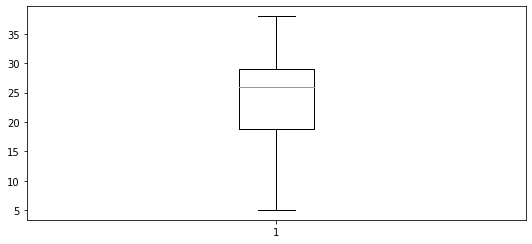

In [80]:
#boxplot for magnitude for top 5 area that often has earthquake
plt.boxplot(specific_data.mag)

{'whiskers': [<matplotlib.lines.Line2D at 0x1301dace0>,
 'caps': [<matplotlib.lines.Line2D at 0x1301db280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1301dab30>],
 'medians': [<matplotlib.lines.Line2D at 0x1301db820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1301dbaf0>],
 'means': []}

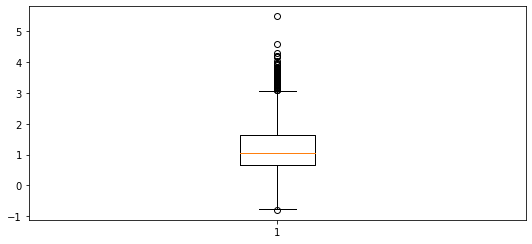

In [81]:
#to find the central tendencies of the data
assignment_Data.describe()

#boxplot for magnitude
plt.boxplot(assignment_Data.mag)